# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [23]:
import pandas as pd
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import probplot
from scipy.stats.mstats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_profiling
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.utils import resample
import scipy
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
pandas_profiling.ProfileReport(df)

Number of variables,3
Number of observations,130
Total Missing (%),0.0%
Total size in memory,3.1 KiB
Average record size in memory,24.6 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
_ = plt.hist(df['temperature'])
_ = plt.xlabel('temperature')
_ = plt.ylabel('quantity')
plt.show

Is the distribution of body temperatures normal?  No, it is right skewed.

The Central Limit Theorem (CLT) is a statistical theory states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

The sample size for this file is 130 observations.  American population in 2018 was estimated to be 327.16 million.  The sample size for this file appears to be too small to be properly translated to the populiation of the US.

It appears that the observations are independent.  Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation.  A simple example is measuring the height of everyone in your sample at a single point in time.  These should be unrelated observations.  However, if you were to measure one child's height over time, these observations would be dependent because the height at each time point would affect the height at future time points.

In [3]:
np.mean(df)

temperature    98.249231
heart_rate     73.761538
dtype: float64

In [4]:
# bootstrap hypothesis test
bootstrap = []
for i in range(10000):
    np.random.seed(i)
    bootstrap.append((resample(df)))
print(len(bootstrap))

10000


In [5]:
bootstrap

[     temperature gender  heart_rate
 47          97.4      M        68.0
 117         97.8      F        71.0
 67          98.6      M        77.0
 103         99.4      F        77.0
 9           98.6      F        86.0
 21          98.2      M        71.0
 36          99.1      M        71.0
 87          98.0      M        78.0
 70          98.1      F        81.0
 88          98.7      M        73.0
 58          98.2      F        65.0
 39          96.4      F        69.0
 87          98.0      M        78.0
 88          98.7      M        73.0
 81          98.0      M        67.0
 25          98.0      F        87.0
 77          98.4      M        70.0
 72          98.0      M        78.0
 9           98.6      F        86.0
 115         98.0      M        64.0
 79          97.6      M        74.0
 82          97.5      M        70.0
 99          98.0      M        74.0
 29          98.1      M        67.0
 32          98.5      M        71.0
 9           98.6      F        86.0
 

one sample or two sample test

In [7]:
one_sample = stats.ttest_1samp(df.temperature, 95.549999)
print(one_sample)

Ttest_1sampResult(statistic=41.97583777231679, pvalue=4.443929529655116e-77)


In [8]:
# sample size of 10
sample_ten = np.random.choice(df.temperature, 10)

In [9]:
np.mean(sample_ten)

98.39

In [10]:
np.max(sample_ten)

100.0

In [11]:
np.min(sample_ten)

97.2

# male/female temperature differences
male
Mean	98.105
Minimum	96.3
Maximum	99.5

female
Mean	98.394
Minimum	96.4
Maximum	100.8


Slight differences but nothing significant.

In [13]:
female_df = df[df.gender == "F"]
male_df = df[df.gender == "M"]

In [14]:
pandas_profiling.ProfileReport(female_df)

Number of variables,4
Number of observations,65
Total Missing (%),0.0%
Total size in memory,2.1 KiB
Average record size in memory,33.2 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [15]:
pandas_profiling.ProfileReport(male_df)

Number of variables,4
Number of observations,65
Total Missing (%),0.0%
Total size in memory,2.1 KiB
Average record size in memory,33.2 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [16]:
np.mean(male_df)

temperature    98.104615
heart_rate     73.369231
dtype: float64

In [17]:
np.mean(female_df)

temperature    98.393846
heart_rate     74.153846
dtype: float64

In [21]:
# Problem 1:

temperatures = df['temperature']
stats.normaltest(temperatures)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

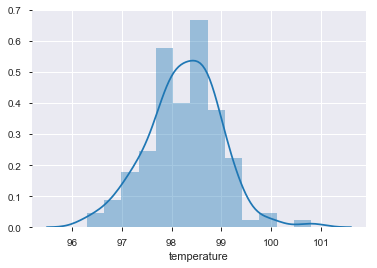

In [24]:
sns.distplot(temperatures)

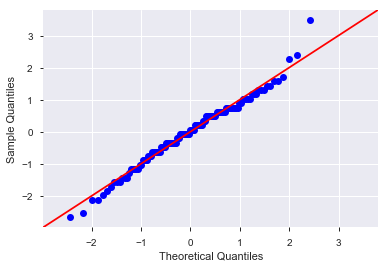

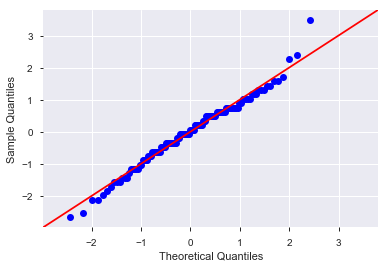

In [25]:
zscores = zscore(temperatures)

sm.qqplot(zscores, line='45')

In [26]:
len(df)

130

In [27]:
true_mean = 98.6
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
sigma_x = sample_std/np.sqrt(len(df))

sample_mean, sample_std, sigma_x

(98.24923076923078, 0.7331831580389454, 0.06430441683789101)

In [28]:
z = (98.6 - sample_mean) / sigma_x
z

5.454823292364079

In [29]:
p = (1-stats.norm.cdf(z))*2
p

4.902157013653152e-08

In [30]:
t = z
t

5.454823292364079

In [31]:
(1 - stats.t.cdf(t, len(df)-1))*2


2.4106320428707306e-07

In [32]:
z0 = stats.norm.ppf(0.975)

upper_temp = sample_mean + z0*sigma_x
lower_temp = sample_mean - z0*sigma_x

lower_temp, upper_temp

(98.12319642818166, 98.3752651102799)

In [33]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

len(df_male), len(df_female)

(65, 65)

In [34]:
male_temps = df_male['temperature']
female_temps = df_female['temperature']


In [35]:
male_mean = male_temps.mean()
male_std = male_temps.std()

male_mean, male_std

(98.1046153846154, 0.6987557623265908)

In [36]:
female_mean = female_temps.mean()
female_std = female_temps.std()

female_mean, female_std

(98.39384615384613, 0.7434877527313665)

In [37]:
h0_mean = 0
mean_diff = female_mean - male_mean
sigma_diff = np.sqrt((female_std**2)/len(female_temps)  + (male_std**2)/len(male_temps))
mean_diff, sigma_diff

(0.289230769230727, 0.12655395041982642)

In [38]:
z = (mean_diff - h0_mean) / sigma_diff
z

2.285434538165274

In [39]:
p = (1-stats.norm.cdf(z))*2
p

0.022287360760677277

The p-value obtained is extremely small. If the null hypothesis was indeed true, the p-value would have been much greater. We can thus safely disregard the null hypothesis.
The true population mean is NOT 98.6F.
We used the one-sample test for this problem. This is because we were comparing the sample mean to a known value (98.6) and trying to find out if the true mean temperature of humans is actually 98.6F.
In this situation, it is more appropriate to use z-statistic. This is because the sample size is greater than 30, thus satisfying the conditions for applying Central Limit Theorem.
Conclusions
The p-value is extremely small. Therefore, we can reject the null hypothesis.
The sample size is greater than 30. Hence, using the z-statistic is more appropriate.
We are comparing the sample mean to known value of population mean. Hence, the one sample test is more appropriate.
We are interested in knowing if the p-value on both sides of the tail. Therefore, we use the two-tailed test.

The p-value obtained by applying the t-statistic is also extremely small. Hence, the null hypothesis is rejected even in this case and all the conclusions arrived at using z-statistics hold.
The result is the same because for sample sizes greater than 30, the z-statistic and the t-statistic yield approximately the same results.
Conclusions¶
The p-value for the t-statistic is ten times larger than the p-value of the z-statisitc.
However, it is still extremely small. Therefore, we can safely reject the null hypothesis.
All the conclusions arrived at with z-statistics also hold with the t-statistics.


From the above results, we are 95% confident that the true mean is somewhere between 98.123F and 98.375F. The margin of error is 10%. Therefore, we can consider any temperature outside this range to be abnormal.
Conclusion
A body temperature below 98.123 and above 98.375 should be considered abnormal.

From the above calculations, it can be seen that the mean and the standard deviations of male and female temperatures differ slightly. The next step is to determine if this difference is a statistically significant one.
For hypothesis testing, the following are defined:
Null Hypothesis: The true mean temperature for men and women are the same.
Alternate Hypothesis: The true mean temperature for men and women are not the same.
The threshold value of $\alpha$ is assumed to be 0.05. Assuming Null Hypothesis is true.


The p-value obtained in this case is 0.02 which is less than the accepted threshold of 0.05.
Therefore, we have to reject the null hypothesis and accept the alternate hypothesis. In other words, there is a significant difference in male and female body temperatures.
For this test, two-sample test was used as we were trying to compare the means of two different groups. Also, the z-statistic was used as the sample sizes for both groups were greater than 30.
Conclusions
The distribution of human temperatures is normal and can be modeled as a Gaussian distribution.
The human temperatures are statistically independent.
We are reasonably confident that the mean temperature of the human body is not 98.6F. This is done by hypothesis testing and calculating the corresponding z-statistic.
The z-statistic and t-statsitic yield similar results for sample sizes greater than 30.
Male and female body temperatures differ significantly to be of statistical importance.